# System Setup

## Running Locally on your system

### For Windows/Mac(Intel):

Install Anaconda Package Manager
https://www.anaconda.com/download

### For Mac Users with M1/M2:
Install miniconda and pytorch
https://developer.apple.com/metal/pytorch/

# Pytorch Basics

In [1]:
import torch

ModuleNotFoundError: No module named 'torch'

## Tensors

At its core, PyTorch is a library for processing tensors. A tensor is a number, vector, matrix or any n-dimensional array.

In [2]:
# Number
t1 = torch.tensor(4.)
t1

tensor(4.)

In [3]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2

tensor([1., 2., 3., 4.])

In [4]:
t3 = torch.tensor([[5., 6],
                   [7, 8],
                   [9, 10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [5]:
# 3-dimensional array
t4 = torch.tensor([
    [[11, 12, 13],
     [13, 14, 15]],
    [[15, 16, 17],
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

Tensors can have any number of dimensions, and different lengths along each dimension. We can inspect the length along each dimension using the .shape property of a tensor.

In [6]:
print(t1.shape, t2.shape, t3.shape, t4.shape)

torch.Size([]) torch.Size([4]) torch.Size([3, 2]) torch.Size([2, 2, 3])


## Interoperability with Numpy

In [7]:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

We can convert a Numpy array to a PyTorch tensor using `torch.from_numpy`

In [8]:
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

Let's verify that the numpy array and torch tensor have similar data types.

In [9]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

We can convert a PyTorch tensor to a Numpy array using the `.numpy` method of a tensor.

In [10]:
# Convert a torch tensor to a numpy array
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

## Tensor operations and gradients

We can combine tensors with the usual arithmetic operations

In [11]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [12]:
# Arithmetic operations
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

PyTorch can automatically compute the derivative of `y` w.r.t. the tensors that have `requires_grad` set to `True` i.e. w and b. To compute the derivatives, we can call the `.backward` method on our result `y`.

In [13]:
y.backward()

The derivates of `y` w.r.t the input tensors are stored in the `.grad` property of the respective tensors.

In [14]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


## Tensors hands on

Pick 3 interesting functions related to PyTorch tensors by reading the documentation:
https://pytorch.org/docs/stable/torch.html

In [15]:
# Example - Finds the exponentiation of the input tensor
t = torch.tensor([[0,1,2],[-3,-4,-5]])
print(torch.exp(t))

tensor([[1.0000e+00, 2.7183e+00, 7.3891e+00],
        [4.9787e-02, 1.8316e-02, 6.7379e-03]])


# Linear Regression

In [16]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

## Dataset

Boston housing dataset: https://www.kaggle.com/c/boston-housing/

Task: House Price Prediction

In [18]:
# Read the data
df = pd.read_csv('train.csv')

In [19]:
# Show first five rows of the data
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [20]:
# Number of rows and columns in the data
df.shape

(333, 15)

In [21]:
# Datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [22]:
# Basic statistics of the data
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,333.0,250.951952,147.859438,1.00000,123.00000,244.00000,377.00000,506.0000
crim,333.0,3.360341,7.352272,0.00632,0.07896,0.26169,3.67822,73.5341
zn,333.0,10.689189,22.674762,0.00000,0.00000,0.00000,12.50000,100.0000
indus,333.0,11.293483,6.998123,0.74000,5.13000,9.90000,18.10000,27.7400
chas,333.0,0.060060,0.237956,0.00000,0.00000,0.00000,0.00000,1.0000
nox,333.0,0.557144,0.114955,0.38500,0.45300,0.53800,0.63100,0.8710
rm,333.0,6.265619,0.703952,3.56100,5.88400,6.20200,6.59500,8.7250
age,333.0,68.226426,28.133344,6.00000,45.40000,76.70000,93.80000,100.0000
dis,333.0,3.709934,1.981123,1.12960,2.12240,3.09230,5.11670,10.7103
rad,333.0,9.633634,8.742174,1.00000,4.00000,5.00000,24.00000,24.0000


In [23]:
# Set the target variable
target = 'medv'

## Pytorch Dataset

Pytorch requires the data to be wrapped in a Dataset wrapper compatible with pytorch

This can be done in two ways:

    1. Using TensorDataset module for tabular numerical data
    2. Defining a custom dataset class compatible with pytorch

In [24]:
from torch.utils.data import TensorDataset, Dataset, DataLoader, random_split

### TensorDataset

To be used for tabular numerical data

In [25]:
# Seperate target variable and features
features = df.drop(columns=[target])
labels = df[target]

print(features.shape, labels.shape)

(333, 14) (333,)


In [26]:
# Convert features and labels to tensors - .values to convert pandas series to array
features = torch.tensor(features.values, dtype=torch.float32)
labels = torch.tensor(labels.values, dtype=torch.float32)

In [27]:
# Convert to pytorch dataset
dataset = TensorDataset(features, labels)

In [28]:
# dataset -> (tensor(features), tensor(label))
dataset[0]

(tensor([1.0000e+00, 6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01,
         3.9690e+02, 4.9800e+00]),
 tensor(24.))

### Custom dataset

Three things need to be included in a custom dataset class:
    
    1. Length Determination (__len__ method)
    2. Data Retrieval (__getitem__ method)
    3. Data Type: __getitem__ method should be ideally be of type torch.tensor() or be convertible to it
    4. Optional - Transformations: To apply on the fly transformations to the data

In [29]:
class MyDataset(Dataset):
    def __init__(self, features, labels, transform=None):
        self.features = features
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = self.features.iloc[idx].values
        y = self.labels.iloc[idx]

        if self.transform:
            x, y = self.transform(x,y)

        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [30]:
dataset_2 = MyDataset(df.drop(columns=[target]), df[target])

In [31]:
dataset_2[0]

(tensor([1.0000e+00, 6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01,
         3.9690e+02, 4.9800e+00]),
 tensor(24.))

### Split the dataset into train and validation

In [32]:
total_length = len(dataset)
train_length = int(0.8 * total_length)
val_length = total_length - train_length

train_dataset, val_dataset = random_split(dataset, [train_length, val_length])

## Dataloaders

In PyTorch, a DataLoader is a Python iterator that allows you to efficiently load batches of data from a dataset, which is especially useful when dealing with large datasets that can't be loaded entirely into memory.

In [33]:
#define batch_size
batch_size = 64

In [34]:
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size)

In [35]:
# Dataloader is not scriptable
train_loader[0]

TypeError: ignored

In [36]:
# Output the first batch
first_batch_feat, first_batch_labels = next(iter(train_loader)) # iter converts an iterable object into an iterator
first_batch_feat, first_batch_labels, first_batch_feat.size()[0]

(tensor([[4.0400e+02, 2.4802e+01, 0.0000e+00, 1.8100e+01, 0.0000e+00, 6.9300e-01,
          5.3490e+00, 9.6000e+01, 1.7028e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01,
          3.9690e+02, 1.9770e+01],
         [2.1200e+02, 3.7578e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
          5.4040e+00, 8.8600e+01, 3.6650e+00, 4.0000e+00, 2.7700e+02, 1.8600e+01,
          3.9524e+02, 2.3980e+01],
         [8.5000e+01, 5.0590e-02, 0.0000e+00, 4.4900e+00, 0.0000e+00, 4.4900e-01,
          6.3890e+00, 4.8000e+01, 4.7794e+00, 3.0000e+00, 2.4700e+02, 1.8500e+01,
          3.9690e+02, 9.6200e+00],
         [3.0700e+02, 7.5030e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
          7.4200e+00, 7.1900e+01, 3.0992e+00, 7.0000e+00, 2.2200e+02, 1.8400e+01,
          3.9690e+02, 6.4700e+00],
         [1.4200e+02, 1.6286e+00, 0.0000e+00, 2.1890e+01, 0.0000e+00, 6.2400e-01,
          5.0190e+00, 1.0000e+02, 1.4394e+00, 4.0000e+00, 4.3700e+02, 2.1200e+01,
          3.9690e+02, 3.4410e+01],
     

## Model

In [37]:
class HousingModel(nn.Module):
    def __init__(self, input_size, output_size):
        # Call parent class constructor
        super().__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.linear = nn.Linear(self.input_size, self.output_size)

    def forward(self, features):
        output = self.linear(features)
        return output

    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out.squeeze(), targets)    # Calculate loss
        return loss

    def validation_step(self, batch):
        inputs, targets = batch
        with torch.no_grad():
            out = self(inputs)
            loss = F.mse_loss(out.squeeze(), targets)
        return {'val_loss': loss}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))

In [38]:
model = HousingModel(input_size=14, output_size=1)

In [39]:
model

HousingModel(
  (linear): Linear(in_features=14, out_features=1, bias=True)
)

## Optimizer

Helps perform gradient descent in an optimized way

In [40]:
# SGD: Stochastic Gradient Descent
optim = torch.optim.SGD

## Training

In [41]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt):
    history = []
    optimizer = opt(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [42]:
result = evaluate(model, val_loader)
result

{'val_loss': 17565.794921875}

In [43]:
# set learning rate
learning_rate = 1e-6

In [44]:
history = fit(10, learning_rate, model, train_loader, val_loader, optim)

Epoch [0], val_loss: 866.3629
Epoch [1], val_loss: 505.7294
Epoch [2], val_loss: 286.9734
Epoch [3], val_loss: 183.9630
Epoch [4], val_loss: 134.5215
Epoch [5], val_loss: 85.5469
Epoch [6], val_loss: 123.4613
Epoch [7], val_loss: 92.0214
Epoch [8], val_loss: 154.1272
Epoch [9], val_loss: 80.2938


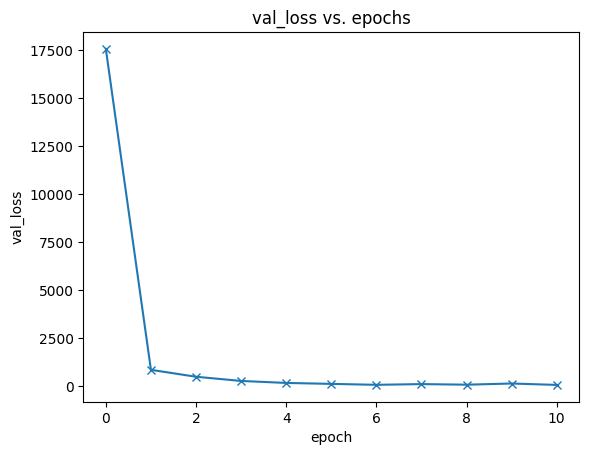

In [45]:
losses = [r['val_loss'] for r in [result] + history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

## Prediction

In [46]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [47]:
x, target = val_dataset[5]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

Input:  tensor([237.0000,   0.5206,   0.0000,   6.2000,   1.0000,   0.5070,   6.6310,
         76.5000,   4.1480,   8.0000, 307.0000,  17.4000, 388.4500,   9.5400])
Target:  25.100000381469727
Prediction: 30.490507125854492


In [49]:
def compute_mse(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    total_count = 0

    with torch.no_grad():  # Ensure no gradients are computed during this block
        for batch in data_loader:
            inputs, targets = batch
            predictions = model(inputs)
            loss = F.mse_loss(predictions.squeeze(), targets)
            total_loss += loss.item() * len(inputs)  # Accumulate the total loss
            total_count += len(inputs)  # Accumulate the total number of samples

    # Return the average loss
    return total_loss / total_count

In [50]:
mse_value = compute_mse(model, val_loader)
print("MSE:", mse_value)

MSE: 108.86781271180111


## Save the model

In [51]:
torch.save(model.state_dict(), 'housing-linear.pth')

## Load the saved model

In [52]:
loaded_model = HousingModel(14,1)

In [53]:
loaded_model.load_state_dict(torch.load('housing-linear.pth'))

<All keys matched successfully>

# Task

Apply linear regression using Pytorch on this dataset:
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv